In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-tank-india-dataset/Shark Tank India Dataset.csv


### Data Description
* Episode_number - Number of the episode
* Pitch_number - Number of the Pitch
* Brand_name - Name of the brand Idea
* Idea - behind the brand building Deal
* Deal - done or not ; 1 - YES, 0 - NO
* Pitcher_ask_amount - Amount asked by the pitchers
* Ask_equity - Equity offered by the pitchers
* Ask_valuation - Valuation asked by pitchers
* Deal_amount - Final Deal Amount
* Deal_equity - Final Deal equity percentage
* Deal_valuation - Final Valuation of Company after Deal
* Ashneer_present - Ashneer was present during the pitching ; 1 - YES, 0 - NO
* Anupam_present - Anupam was present during the pitching ; 1 - YES, 0 - NO
* Aman_present - Aman was present during the pitching ; 1 - YES, 0 - NO
* Namita_present - Namita was present during the pitching ; 1 - YES, 0 - NO
* Vineeta_present - Vineeta was present during the pitching ; 1 - YES, 0 - NO
* Peyush_present - Peyush was present during the pitching ; 1 - YES, 0 - NO
* Ghazal_present - Ghazal was present during the pitching ; 1 - YES, 0 - NO
* Ashneer_deal - Ashneer is a part of Final Deal ; 1 - YES, 0 - NO
* Anupam_deal - Anupam is a part of Final Deal ; 1 - YES, 0 - NO
* Aman_deal - Aman is a part of Final Deal ; 1 - YES, 0 - NO
* Namita_deal - Namita is a part of Final Deal ; 1 - YES, 0 - NO
* Vineeta_deal - Vineeta is a part of Final Deal ; 1 - YES, 0 - NO
* Peyush_deal - Peyush is a part of Final Deal ; 1 - YES, 0 - NO
* Ghazal_deal - Ghazal is a part of Final Deal ; 1 - YES, 0 - NO
* Total_sharks_invested - Number of total sharks invested in the Company
* Amount_per_shark - Amount per shark invested
* Equity_per_shark - Final Equity gained per Shark

## Importing Necessary Libraries**¶¶


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

## Loading Dataset

In [3]:
df=pd.read_csv("/kaggle/input/shark-tank-india-dataset/Shark Tank India Dataset.csv")

### Viewing top 5 

In [4]:
df.head()

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


### Fetching other rows

In [5]:
df.head().iloc[:,9:]

,deal_equity,deal_valuation,ashneer_present,anupam_present,aman_present,namita_present,vineeta_present,peyush_present,ghazal_present,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,16.00,468.75,1,1,1,1,1,0,0,1,0,1,0,1,0,0,3,25.0,5.333333
1,50.00,80.00,1,1,1,1,1,0,0,1,0,0,0,1,0,0,2,20.0,25.000000
2,30.00,83.33,1,1,1,1,1,0,0,0,1,0,0,1,0,0,2,12.5,15.000000
3,2.75,2545.45,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,70.0,2.750000
4,0.00,0.00,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0.000000


# Workflow
Step 1 - Understanding data

Understanding data
Basic info
columns types
Stats summary

Step 2 - Cleaning and Transforming data

Step 3 - Insights


# Step 1 understanding of data

In [6]:
# Fetching rows and columns
df.shape 

(117, 28)

In [7]:
## Fetching column names
df.columns

Index(['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal',
       'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present',
       'aman_present', 'namita_present', 'vineeta_present', 'peyush_present',
       'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal',
       'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal',
       'total_sharks_invested', 'amount_per_shark', 'equity_per_shark'],
      dtype='object')

In [8]:
## Getting basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [9]:
# fetching null values
df.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

### There are no null values

In [10]:
## Checking duplicates
df.duplicated().sum()

0

### There are no duplicates

In [11]:
df.describe().T ## for checking outliers in the data 


,count,mean,std,min,25%,50%,75%,max
episode_number,117.0,18.735043,10.070778,1.00000,10.00,19.00,27.00,35.00
pitch_number,117.0,59.000000,33.919021,1.00000,30.00,59.00,88.00,117.00
deal,117.0,0.555556,0.499041,0.00000,0.00,1.00,1.00,1.00
pitcher_ask_amount,117.0,319.854709,2767.842777,0.00101,45.00,50.00,80.00,30000.00
ask_equity,117.0,5.188034,3.892121,0.25000,2.50,5.00,7.50,25.00
ask_valuation,117.0,3852.462479,11931.601957,0.01000,666.67,1250.00,2857.14,120000.00
deal_amount,117.0,31.982915,36.687391,0.00000,0.00,25.00,50.00,150.00
deal_equity,117.0,8.963504,13.106769,0.00000,0.00,3.00,15.00,75.00
deal_valuation,117.0,467.104872,919.988864,0.00000,0.00,100.00,500.00,6666.67
ashneer_present,117.0,0.837607,0.370397,0.00000,1.00,1.00,1.00,1.00


# Step 2 - Data Cleaning

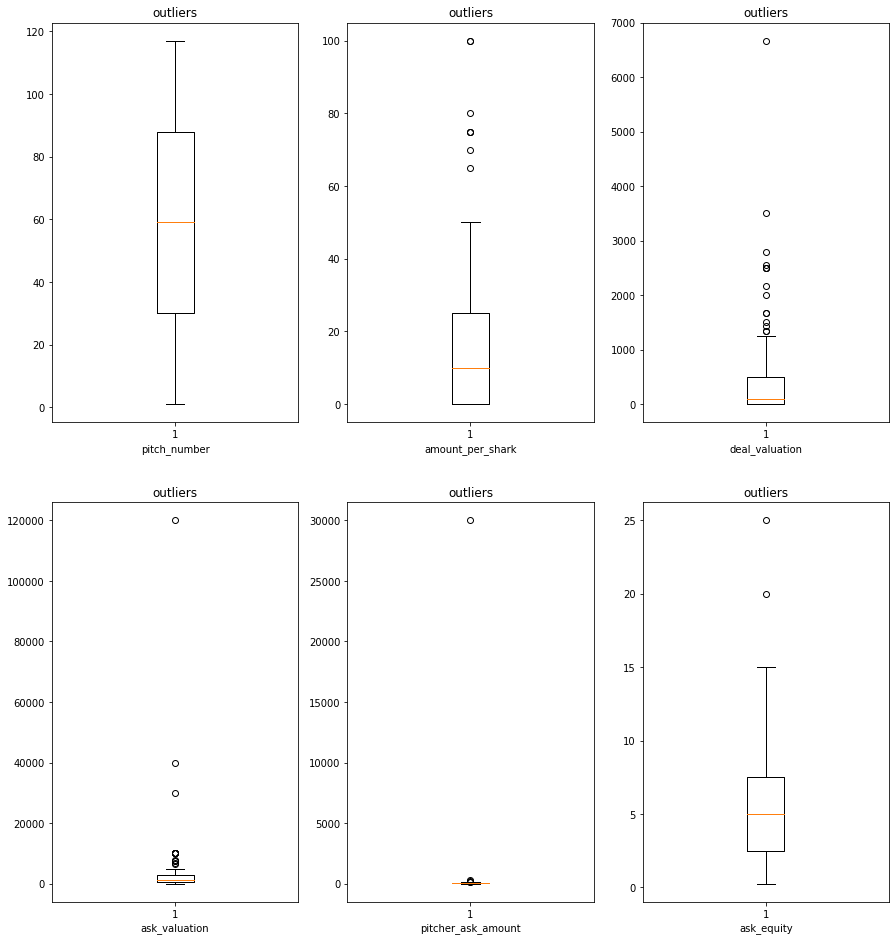

In [12]:
## Checking outliers using Boxplot
l=["pitch_number","amount_per_shark","deal_valuation","ask_valuation","pitcher_ask_amount","ask_equity"]
pos=1
plt.figure(figsize=(15,25))
for i in l:
    
    plt.subplot(3,3,pos)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.title("outliers")
    pos=pos+1


## There are outliers in the data 


In [13]:
### Checking correlation
df.corr()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
episode_number,1.000000,0.998850,-0.214033,-0.069500,-0.077674,-0.070829,-0.187023,-0.114719,-0.146336,-0.342116,...,-0.116462,-0.121671,-0.264855,-0.041819,-0.035758,0.022564,0.229482,-0.121894,-0.157896,-0.073187
pitch_number,0.998850,1.000000,-0.223068,-0.074881,-0.080792,-0.073517,-0.199542,-0.119973,-0.151003,-0.338967,...,-0.117380,-0.129104,-0.272245,-0.053756,-0.028765,0.013214,0.226210,-0.131541,-0.166871,-0.079109
deal,-0.214033,-0.223068,1.000000,-0.106927,-0.076438,-0.151695,0.736002,0.609043,0.409138,-0.020728,...,0.373509,0.454369,0.461369,0.430422,0.342997,0.489898,0.225630,0.759342,0.653882,0.461046
pitcher_ask_amount,-0.069500,-0.074881,-0.106927,1.000000,0.470198,0.911174,-0.080719,-0.067233,-0.045988,0.040759,...,-0.044099,-0.050348,-0.053685,-0.045850,-0.036575,-0.052946,-0.024308,-0.084288,-0.071281,-0.050873
ask_equity,-0.077674,-0.080792,-0.076438,0.470198,1.000000,0.260603,-0.177955,0.288341,-0.310331,-0.047404,...,-0.088782,0.013584,-0.140932,0.027449,0.096837,-0.026575,0.071451,-0.028387,-0.165141,0.238074
ask_valuation,-0.070829,-0.073517,-0.151695,0.911174,0.260603,1.000000,-0.090163,-0.155565,0.017869,0.053817,...,-0.052650,-0.095488,-0.085926,-0.075664,-0.068814,-0.089131,-0.050633,-0.140668,-0.066631,-0.118541
deal_amount,-0.187023,-0.199542,0.736002,-0.080719,-0.177955,-0.090163,1.000000,0.370487,0.636411,-0.026851,...,0.392853,0.335148,0.482279,0.443929,0.315109,0.384539,0.188542,0.695950,0.793392,0.239212
deal_equity,-0.114719,-0.119973,0.609043,-0.067233,0.288341,-0.155565,0.370487,1.000000,-0.082694,-0.093570,...,0.127167,0.267897,0.150735,0.136270,0.359560,0.399927,0.188478,0.432880,0.359031,0.897922
deal_valuation,-0.146336,-0.151003,0.409138,-0.045988,-0.310331,0.017869,0.636411,-0.082694,1.000000,0.018973,...,0.206179,0.219510,0.360149,0.178616,-0.001066,0.138179,-0.002742,0.319298,0.581751,-0.080662
ashneer_present,-0.342116,-0.338967,-0.020728,0.040759,-0.047404,0.053817,-0.026851,-0.093570,0.018973,1.000000,...,0.205939,-0.005886,0.246972,-0.025346,-0.108422,-0.143856,-0.475201,-0.026656,-0.049810,-0.102568


<AxesSubplot:>

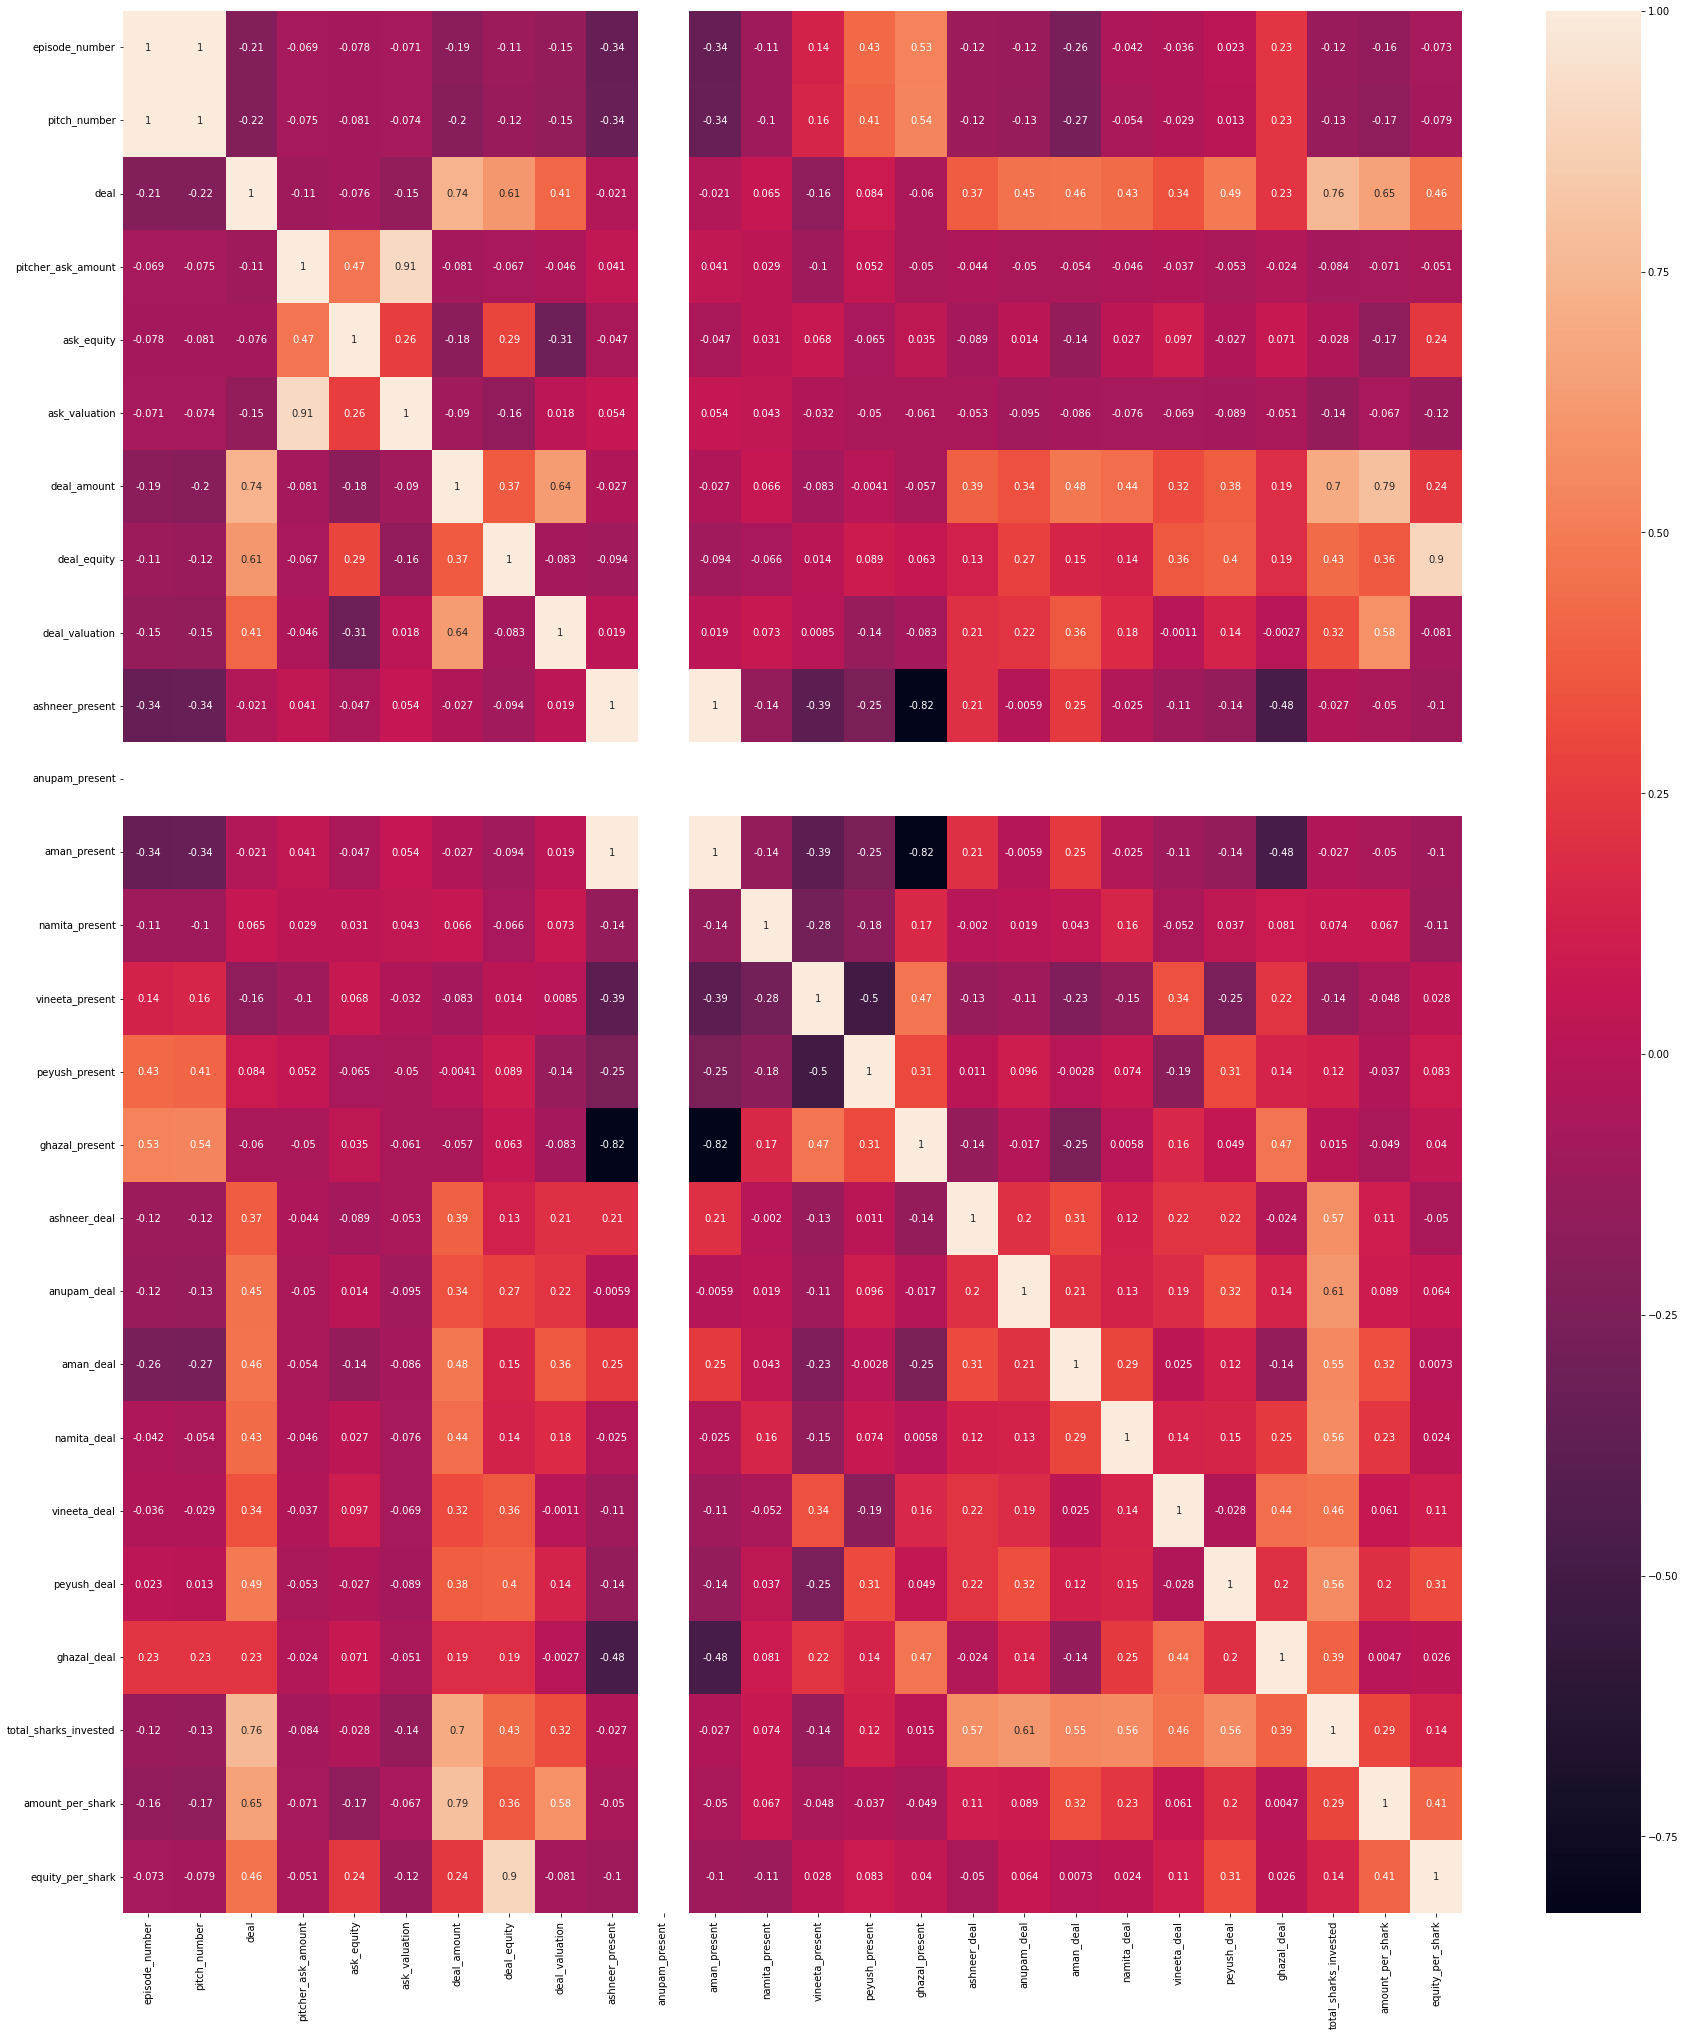

In [14]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),data=df,annot=True)

# Finding Insights

In [15]:
## Checking uniques
for i in df.columns:
    print(i,"----",df[i].unique())

episode_number ---- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35]
pitch_number ---- [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117]
brand_name ---- ['BluePine Industries' 'Booz scooters' 'Heart up my Sleeves' 'Tagz Foods'
 'Head and Heart' 'Agro tourism' 'Qzense Labs' 'Peeschute' 'NOCD' 'Cosiq'
 'JhaJi Achaar' 'Bummer' 'Revamp Moto' 'Hungry Heads' 'Shrawani Engineers'
 'Skippi Pops' 'Menstrupedia' 'Hecolll' 'Raising Superstars' 'Torch-it'
 'La Kheer Deli' 'Beyond Snack' 'Vivalyf Innovations- Easy Life'
 '

In [16]:
### find the number of episodes in this season 
df["episode_number"].nunique()

35

In [17]:
## find the no of brands participated
df["brand_name"].count()

117

In [18]:
## Find total deals accepted
df["deal"].value_counts()

1    65
0    52
Name: deal, dtype: int64

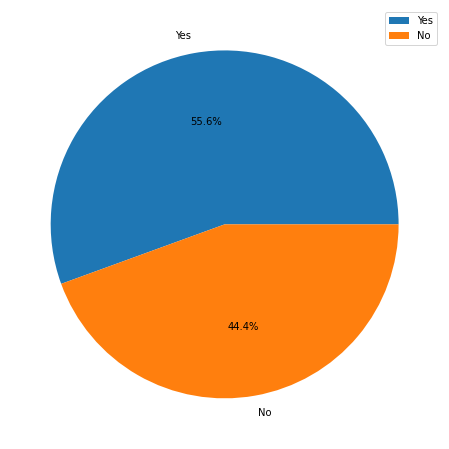

In [19]:
l=["Yes","No"]
plt.figure(figsize=(8,8))
plt.pie(df["deal"].value_counts(),labels=l,autopct="%0.01f%%")
plt.legend();

### 54.7% Deals were accepted by the investors, Mostly deals were accepted

In [20]:
## find the details of minimum deal amount that were accepted
x=df[df["deal"]==1]
x[x["deal_amount"]==x["deal_amount"].min()]


,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
19,7,20,Torch-it,Gadgets for visually impaired people,1,75.0,1.0,7500.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [21]:
## find the details of maximum deal amount that were accepted
x[x["deal_amount"]==x["deal_amount"].max()]

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
50,17,51,Aas Vidyalaya,EdTech App,1,150.0,3.0,5000.0,150.0,15.0,...,1,0,0,1,0,1,0,3,50.0,5.0


### The maximum deal amount which was accpeted was 150.0

In [22]:
df["deal"].iloc[19]=0

## In this 19th row there was an error in which deal was 1 where as deal_amount was 0, so i have change the deal to 0 through feature engineering 

In [23]:
df.iloc[19]

episode_number                                              7
pitch_number                                               20
brand_name                                           Torch-it
idea                     Gadgets for visually impaired people
deal                                                        0
pitcher_ask_amount                                       75.0
ask_equity                                                1.0
ask_valuation                                          7500.0
deal_amount                                               0.0
deal_equity                                               0.0
deal_valuation                                            0.0
ashneer_present                                             1
anupam_present                                              1
aman_present                                                1
namita_present                                              1
vineeta_present                                             1
peyush_p

In [24]:
## find the detail of highest deal 
df[df["deal_amount"]==df["deal_amount"].max()]


,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
50,17,51,Aas Vidyalaya,EdTech App,1,150.0,3.0,5000.0,150.0,15.0,...,1,0,0,1,0,1,0,3,50.0,5.0


In [25]:
## find the highest deal amount that were accepted
df["deal_amount"].max()

150.0

In [26]:
## find the no of brands participated in each episode
df.groupby("episode_number")["brand_name"].count()

episode_number
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    4
17    4
18    4
19    4
20    3
21    3
22    4
23    4
24    3
25    3
26    3
27    4
28    3
29    3
30    4
31    4
32    4
33    4
34    4
35    3
Name: brand_name, dtype: int64

In [27]:
### whos deals were accepted
x[["brand_name","deal","idea"]]

,brand_name,deal,idea
0,BluePine Industries,1,Frozen Momos
1,Booz scooters,1,Renting e-bike for mobility in private spaces
2,Heart up my Sleeves,1,Detachable Sleeves
3,Tagz Foods,1,Healthy Potato Chips
7,Peeschute,1,Disposable Urine Bag
...,...,...,...
106,Colour Me Mad,1,Insoles
108,Tweek Labs,1,Sportswear
109,Proxgy,1,VR
110,Nomad Food Project,1,Bacon Jams


In [28]:
## Checking unique value of deal amount where deal is done
df[df["deal"]==1]["deal_amount"].unique()

array([7.50e+01, 4.00e+01, 2.50e+01, 7.00e+01, 2.00e+01, 5.00e+01,
       1.00e+02, 5.60e+01, 3.00e+01, 1.05e+02, 5.00e-05, 4.50e+01,
       1.50e+02, 8.00e+01, 1.00e+00, 6.00e+01, 3.50e+01, 1.00e+01,
       6.50e+01, 1.01e-03])

## We can see there is no error

In [29]:
## Checking unique value of deal amount where deal is not done
df[df["deal"]==0]["deal_amount"].unique()

array([  0., 100.])

## We can see there is a error of 100

In [30]:
### Finding out the error we got above 
df[df["deal"]==0].sort_values(by="deal_amount",ascending=False).head(5)

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
18,7,19,Raising Superstars,Child Development App,0,100.0,2.0,5000.00,100.0,4.0,...,1,0,1,0,0,0,0,2,50.0,2.0
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
97,30,98,Scholify,Scholarship Platform,0,50.0,7.5,666.67,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
74,23,75,Modern Myth,Bags,0,75.0,5.0,1500.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
77,24,78,Nuskha Kitchen,Homemade Foods,0,20.0,10.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0


## We can see there is error is 18th row  where deal is 0 and deal amount is 100

In [31]:
df["deal"].iloc[18]=1

## We are making this deal to 1 as we can see 2 of the sharks has invested 

In [32]:
df.iloc[18]

episode_number                               7
pitch_number                                19
brand_name                  Raising Superstars
idea                     Child Development App
deal                                         1
pitcher_ask_amount                       100.0
ask_equity                                 2.0
ask_valuation                           5000.0
deal_amount                              100.0
deal_equity                                4.0
deal_valuation                          2500.0
ashneer_present                              1
anupam_present                               1
aman_present                                 1
namita_present                               1
vineeta_present                              1
peyush_present                               0
ghazal_present                               0
ashneer_deal                                 1
anupam_deal                                  0
aman_deal                                    1
namita_deal  

In [33]:
## we are recalculating deals 
df["deal"].value_counts()

1    65
0    52
Name: deal, dtype: int64

In [34]:
## find the total deal amount invested in this season 
print("Total deal amount invested in this season is   ",df["deal_amount"].sum())


Total deal amount invested in this season is    3742.00106


In [35]:
## find the most dealing episodes
df.groupby(["episode_number"])["deal"].sum().sort_values(ascending=False).reset_index()

,episode_number,deal
0,1,3
1,15,3
2,21,3
3,33,3
4,8,3
5,10,3
6,17,3
7,16,3
8,13,3
9,25,2


In [36]:
## find the most expensive dealing episode 
df.groupby("episode_number")["deal_amount"].sum().sort_values(ascending=False).reset_index()


,episode_number,deal_amount
0,17,280.00000
1,13,255.00000
2,16,170.00000
3,21,160.00000
4,28,150.00000
5,25,150.00000
6,6,150.00000
7,20,140.00000
8,1,140.00000
9,8,136.00000


### Epidsode 17 was the most expensive dealing episode where 3 deals were made by the sharks

In [37]:
## how many sharks particated in the show and what were there names 
len(df.columns[11:18])


7

### 7 sharks were presented in the show 


In [38]:
df.columns[11:18]

Index(['ashneer_present', 'anupam_present', 'aman_present', 'namita_present',
       'vineeta_present', 'peyush_present', 'ghazal_present'],
      dtype='object')

In [39]:
m=df.columns[11:18]
l=[]
for i in m:
    i=i.replace("_present","")
    l.append(i)
print(l)
    

['ashneer', 'anupam', 'aman', 'namita', 'vineeta', 'peyush', 'ghazal']


## These were the name of the total sharks present on the show  
* 'ashneer'
* 'anupam'
* 'aman'
* 'namita'
* 'vineeta'
* 'peyush'
* 'ghazal' 


The appearance of each shark were   [98, 117, 98, 106, 66, 88, 26]
The Name of each shark were   ['ashneer', 'anupam', 'aman', 'namita', 'vineeta', 'peyush', 'ghazal']


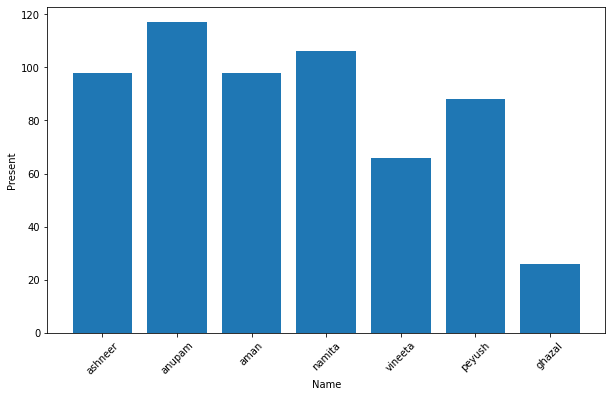

In [40]:
## find the appearance of each shark and make their bar chart 
m=df.columns[11:18]
present=[]
l=[]
for i in m:
    s=df[i].sum()
    i=i.replace("_present","")
    l.append(i)
    present.append(s)
print("The appearance of each shark were  ",present)
print("The Name of each shark were  ",l)

plt.figure(figsize=(10,6))
plt.bar(l,present)
plt.xlabel("Name")
plt.ylabel("Present")
plt.xticks(rotation=45);

In [41]:
df.columns[18:25]

Index(['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal',
       'vineeta_deal', 'peyush_deal', 'ghazal_deal'],
      dtype='object')

In [42]:
## how many times each investor invested the deals 
d=df.columns[18:25]
invested=[]
for i in d:
    s=df[i].sum()
    invested.append(s)
print(invested)
print(l)

[21, 24, 28, 22, 15, 27, 7]
['ashneer', 'anupam', 'aman', 'namita', 'vineeta', 'peyush', 'ghazal']


In [43]:
##  find the total amount invested by each shark 
d=df.columns[18:25]
Total_invested=[]
for i in d:
    s=df[df[i]==1]
    x=s["amount_per_shark"].sum()
    Total_invested.append(x)
print(Total_invested)
print(l)

[494.33333333, 533.83360253, 887.500016693, 648.333602533, 328.3333333300001, 719.6669191630001, 130.0002525]
['ashneer', 'anupam', 'aman', 'namita', 'vineeta', 'peyush', 'ghazal']


In [44]:
## find the equity percent that each shark gets 
d=df.columns[18:25]
equity_pert_shark=[]
for i in d:
    s=df[df[i]==1]
    x=s["equity_per_shark"].sum()
    equity_pert_shark.append(x)
print(equity_pert_shark)
print(l)

[93.249999999, 166.35, 160.263333334, 134.78333333400002, 131.533333333, 315.84999999999997, 46.7]
['ashneer', 'anupam', 'aman', 'namita', 'vineeta', 'peyush', 'ghazal']


In [45]:
## find the highest amount invested by shark and in which brand they invested 
df["amount_per_shark"].max()

100.0

In [46]:
df[df["amount_per_shark"]==df["amount_per_shark"].max()]

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
42,15,43,Hammer Lifestyle,Smart Audio Products,1,30.0,3.0,1000.0,100.0,40.0,...,0,0,1,0,0,0,0,1,100.0,40.0
87,27,88,Insurance Samadhan,Insurance Solutions,1,100.0,1.0,10000.0,100.0,4.0,...,0,0,0,0,0,1,0,1,100.0,4.0


In [47]:
## find the highest equity a shark gets 
df[df["equity_per_shark"]==df["equity_per_shark"].max()]

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
65,21,66,Sid07 Designs,Inventions,1,47.0,10.0,470.0,25.0,75.0,...,0,0,0,0,0,1,0,1,25.0,75.0


In [48]:
## find the most attracted ideas accpeted by sharks 
df[df["total_sharks_invested"]==df["total_sharks_invested"].max()]

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
15,6,16,Skippi Pops,Ice-Pops,1,45.0,5.0,900.0,100.0,15.0,...,1,1,1,1,1,0,0,5,20.0,3.0
49,17,50,Find Your Kicks India,Sneaker Resale,1,50.0,10.0,500.0,50.0,25.0,...,1,1,1,1,0,1,0,5,10.0,5.0
63,20,64,IN A CAN,Can Cocktails,1,50.0,2.0,2500.0,100.0,10.0,...,1,1,1,1,0,1,0,5,20.0,2.0
79,25,80,Sunfox Technologies,Portable ECG Device,1,100.0,2.0,5000.0,100.0,6.0,...,0,1,0,1,1,1,1,5,20.0,1.2


In [49]:
## find how many percent of entreprenaurs got more , less and same amount 
x=df[df["deal"]==1]
print("Those who got more than their ask amount",len(x[x["deal_amount"]>x["pitcher_ask_amount"]])*100/len(x))
print("Those who got less than their ask amount",len(x[x["deal_amount"]<x["pitcher_ask_amount"]])*100/len(x))
print("Those who got same as their ask amount",len(x[x["deal_amount"]==x["pitcher_ask_amount"]])*100/len(x))

Those who got more than their ask amount 15.384615384615385
Those who got less than their ask amount 15.384615384615385
Those who got same as their ask amount 69.23076923076923


In [50]:
## find the percent of entreprenaurs who got equity more, less or same in percent
x=df[df["deal"]==1]
print("Entreprenaurs who got equity more",len(x[x["deal_equity"]>x["ask_equity"]])*100/len(x))
print("Entreprenaurs who got equity less",len(x[x["deal_equity"]<x["ask_equity"]])*100/len(x))
print("Entreprenaurs who got equity same",len(x[x["deal_equity"]==x["ask_equity"]])*100/len(x))

Entreprenaurs who got equity more 90.76923076923077
Entreprenaurs who got equity less 4.615384615384615
Entreprenaurs who got equity same 4.615384615384615


# Insights

* There were total 7 sharks presented in this show.
* Total amount invested in this season was 3742.00106
* There were total 35 episodes where 117 brands took part.
* Out of 117 brands 65 brands got the deal.
* The max deal amount offered was 150 which was offered by peyush.
* While calculating minimum deal amount we got In the 19th row there was an error in which deal was 1 where as deal_amount was 0, so i have change the deal to 0 through feature engineering.
* There was an error is 18th row  where deal is 0 and deal amount is 100, So we changed it to deal 1 as 2 of the sharks has invested.
* Epidsode 17 was the most expensive dealing episode where 3 deals were made by the sharks
* Shark Anupam has most appearance in this season
* Shark Aman and Peyush has made mode of the deals
* Total amount invested by Shark Aman has was highest 
* Shark Peyush has got the highest equity in brand Sid07 Designs
* 69% of the brands has got same as their ask amount.
* 90% of the deal equity were more than brands ask equity



In [51]:
df.to_csv("shark_tank.csv")
